<hr style='border-top:1px solid yellow;'>
<hr style='border-top:1px dotted green;'>
<h1 style='color:Blue;text-align:center;'> <i> TABULAR PLAYGROUND SERIES MAY </i> </h1>
<hr style='border-top:1px dotted orange;'>
<hr style='border-top:1px dotted red;'>

![](https://mykidstale.com/wp-content/uploads/2016/12/PE-1704-01.jpg)

### Notebook of Top 15% in Private Leaderboard

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/tabular-playground-series-may-2021/sample_submission.csv
/kaggle/input/tabular-playground-series-may-2021/train.csv
/kaggle/input/tabular-playground-series-may-2021/test.csv


## Importing the required Libraries:

In [2]:
import math
import plotly.express as px
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

## Importing the Data:

In [3]:
# Importing the Data:
train = pd.read_csv("../input/tabular-playground-series-may-2021/train.csv")
test = pd.read_csv("../input/tabular-playground-series-may-2021/test.csv")
sub_file = pd.read_csv('../input/tabular-playground-series-may-2021/sample_submission.csv')

# Data Analysis:

In [4]:
train.describe()

,id,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,...,feature_40,feature_41,feature_42,feature_43,feature_44,feature_45,feature_46,feature_47,feature_48,feature_49
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,...,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000,100000.00000
mean,49999.500000,0.257830,0.431720,0.114130,0.590550,0.599770,0.160820,0.731490,1.228920,0.903350,...,0.712270,0.582070,0.529230,0.616310,0.135100,0.358660,0.516810,0.39004,0.970850,0.55712
std,28867.657797,0.929033,1.977862,0.519584,1.844558,2.785531,0.601149,2.343465,2.692732,3.415258,...,1.721863,2.003114,2.300826,2.360955,0.627592,1.464187,2.171415,1.48735,2.576615,1.68093
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,-2.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000
25%,24999.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000
50%,49999.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000
75%,74999.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.00000
max,99999.000000,10.000000,31.000000,6.000000,26.000000,38.000000,10.000000,27.000000,31.000000,39.000000,...,21.000000,32.000000,37.000000,33.000000,9.000000,26.000000,29.000000,25.00000,44.000000,20.00000


### Drop Unwanted Columns:

In [5]:
train = train.drop(['id'], axis=1)
test = test.drop(['id'], axis=1)

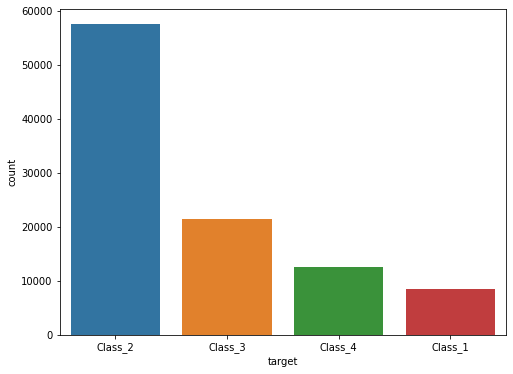

In [6]:
## Bar Graph providing info about target values count:
plt.figure(figsize=(8,6))
sns.countplot(x='target', data=train, order=train['target'].value_counts().index);

In [7]:
train['target'].value_counts()

Class_2    57497
Class_3    21420
Class_4    12593
Class_1     8490
Name: target, dtype: int64

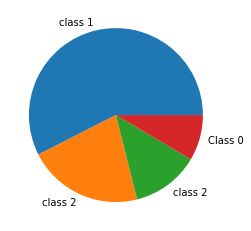

In [8]:
u = np.array([57497,21420,12593,8490])
mylabels = ["class 1", "class 2", "class 2","Class 0"]
plt.pie(u, labels = mylabels)
plt.show() 

<AxesSubplot:>

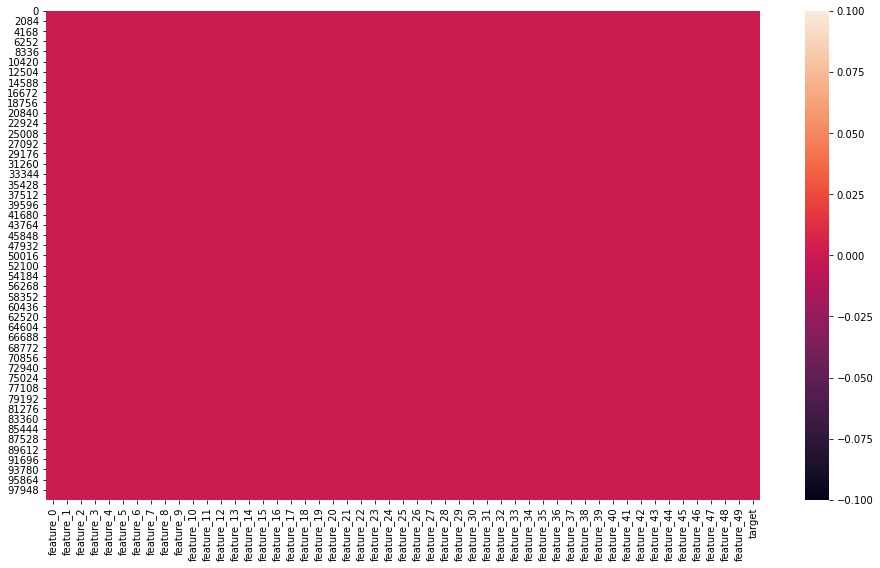

In [9]:
# HeatMap to Check for any Missing Values:
plt.figure(figsize=(16,9))
sns.heatmap(train.isnull())

### So, we see from the above graph the there are no any missing values present.

In [10]:
train.describe().T\
        .style.bar(subset=['mean'], color=px.colors.qualitative.G10[0])\
        .background_gradient(subset=['std'], cmap='Greens')\
        .background_gradient(subset=['50%'], cmap='BuGn')

,count,mean,std,min,25%,50%,75%,max
feature_0,100000.000000,0.257830,0.929033,0.000000,0.000000,0.000000,0.000000,10.000000
feature_1,100000.000000,0.431720,1.977862,0.000000,0.000000,0.000000,0.000000,31.000000
feature_2,100000.000000,0.114130,0.519584,0.000000,0.000000,0.000000,0.000000,6.000000
feature_3,100000.000000,0.590550,1.844558,0.000000,0.000000,0.000000,0.000000,26.000000
feature_4,100000.000000,0.599770,2.785531,0.000000,0.000000,0.000000,0.000000,38.000000
feature_5,100000.000000,0.160820,0.601149,0.000000,0.000000,0.000000,0.000000,10.000000
feature_6,100000.000000,0.731490,2.343465,0.000000,0.000000,0.000000,0.000000,27.000000
feature_7,100000.000000,1.228920,2.692732,0.000000,0.000000,0.000000,1.000000,31.000000
feature_8,100000.000000,0.903350,3.415258,0.000000,0.000000,0.000000,0.000000,39.000000
feature_9,100000.000000,0.940120,1.904172,0.000000,0.000000,0.000000,1.000000,17.000000


### From above graph we see as the mean is increased Standard Deviation Increases.

# Encoding:

In [11]:
## Used Label Encoder to Encode the Target Column:
label_encoder = LabelEncoder()
train['target'] = label_encoder.fit_transform(train['target'])

<h1 style='font-family:Calibri-body;background-color: #92a8d1;text-align:center;height:32px;'> << AUTOML ALGORITHM  >> </h1> 

### Importing the libraries required to AutoML.

In [12]:
!pip install -U lightautoml
from lightautoml.automl.presets.tabular_presets import TabularAutoML, TabularUtilizedAutoML
from lightautoml.tasks import Task
from sklearn.metrics import log_loss

     |████████████████████████████████| 250 kB 4.5 MB/s 
     |████████████████████████████████| 232 kB 7.6 MB/s 
     |████████████████████████████████| 1.2 MB 8.2 MB/s 
     |████████████████████████████████| 204 kB 17.3 MB/s 
     |████████████████████████████████| 424 kB 18.6 MB/s 
     |████████████████████████████████| 2.9 MB 22.3 MB/s 
     |████████████████████████████████| 90 kB 9.7 MB/s 
     |████████████████████████████████| 93 kB 2.2 MB/s 
     |████████████████████████████████| 121 kB 37.9 MB/s 
     |████████████████████████████████| 94 kB 2.7 MB/s 
     |████████████████████████████████| 84 kB 3.8 MB/s 
     |████████████████████████████████| 100 kB 9.3 MB/s 
  Created wheel for efficientnet-pytorch: filename=efficientnet_pytorch-0.7.1-py3-none-any.whl size=16446 sha256=3cac7905ad1410780afb80f48c945991e08df2a3a44c03c81815ef347cf3a56e
  Stored in directory: /root/.cache/pip/wheels/0e/cc/b2/49e74588263573ff778da58cc99b9c6349b496636a7e165be6
  Created wheel for json2html: 

### Tabular Specification provided to the AutoML as its Parameters.

In [13]:
%%time
tabautoml = TabularUtilizedAutoML(timeout = 1500,
                               task = Task('multiclass'),
                               cpu_limit = 8,
                               verbose=1,
                               reader_params = {'num_threads':8,'advanced_roles': True,'learning_rate':0.15,'n_folds':15,'num_leaves':128,'n_jobs': 8,'cv':5,'random_state':42},
                               tuning_params = {'max_tuning_iter': 50, 'max_tuning_time': 60},)

CPU times: user 22.4 ms, sys: 141 µs, total: 22.5 ms
Wall time: 21.8 ms


### Fit the prediction for training the data:

In [14]:
## Here roles define the parameters to be given to AutoML
target_col = 'target'
roles = {
    'target': target_col ,
    'drop': ['id'],
     }
LAML_pred = tabautoml.fit_predict(train, roles = roles)

Time limit exceeded after calculating fold 1
Copying TaskTimer may affect the parent PipelineTimer, so copy will create new unlimited TaskTimer
Time limit exceeded after calculating fold 2
Time limit exceeded after calculating fold 3
Time limit exceeded in one of the tasks. AutoML will blend level 1 models.                                         
Try to set higher time limits or use Profiler to find bottleneck and optimize Pipelines settings


### Testing data sent to AutoML for predictions:

In [15]:
LiAML_pred= tabautoml.predict(test)
preds_df = LiAML_pred.data
pred = pd.DataFrame(preds_df)

## Taking the Submission file Index column for creating Output File:
LiAML_predi = pd.concat([sub_file['id'],pred],axis=1)
LiAML_predi.columns=['id','Class_1','Class_2','Class_3','Class_4']
LiAML_predi.to_csv('./LiAML_Output.csv',index=False)
LiAML_predi.head(10)

,id,Class_1,Class_2,Class_3,Class_4
0,100000,0.093534,0.612698,0.174328,0.119440
1,100001,0.078968,0.686007,0.145252,0.089773
2,100002,0.086080,0.637152,0.175174,0.101594
3,100003,0.082577,0.541159,0.279213,0.097052
4,100004,0.072306,0.616168,0.194749,0.116777
5,100005,0.075993,0.465146,0.327704,0.131157
6,100006,0.103602,0.375149,0.412511,0.108739
7,100007,0.085949,0.742256,0.113047,0.058748
8,100008,0.083471,0.569799,0.239763,0.106967
9,100009,0.081269,0.543186,0.233420,0.142125


<hr style='border-top:1px solid brown;'>
<h2 style='color:Green;text-align:center;'> <i> THANK YOU PLEASE DO UPVOTE </i> </h2>
<hr style='border-top:1px solid blue;'> 